<a href="https://colab.research.google.com/github/VuMaiTuan/20144483-VuMaiTuan/blob/main/Project_AI__Topic_4_Based_on_iris_image_to_ocular_disease_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**VŨ MAI TUÂN 20144483** 

#**I.Phân tích dữ liệu Các loại bệnh về mắt**

---


#Bình thường - Normal (N),
#Bệnh tiểu đường - Diabetes (D),
#Bệnh tăng nhãn áp - Glaucoma (G),
#Đục thủy tinh thể - Cataract (C),
#Thoái hóa điểm vàng liên quan đến tuổi tác - Age related Macular Degeneration(A),
#Tăng huyết áp - Hypertension (H),
#Cận thị bệnh lý - Pathological Myopia (M),
#Các bệnh/bất thường khác - Other diseases/abnormalities (O)

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/data.csv")

In [ ]:
data_melted = data.drop(data.columns[list(range(3,16))+list(range(18,19))], axis=1)

In [ ]:
data_melted.head()

,ID,Patient Age,Patient Sex,labels,target
0,0,69,Female,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]"
1,1,57,Male,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]"
2,2,42,Male,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]"
3,4,53,Male,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]"
4,5,50,Female,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]"


In [ ]:
string_labels = []
for each in data_melted.labels:
    if(len(each)==5):
        string_labels.append(each[2])
    else:
        print(each)

In [ ]:
data_melted = data_melted.drop(data_melted.columns[[0, 3, 4]], axis=1)
data_melted = pd.concat([data_melted, pd.DataFrame(string_labels, columns = ['Labels'])], axis=1)

In [ ]:
data_melted.head()

,Patient Age,Patient Sex,Labels
0,69,Female,N
1,57,Male,N
2,42,Male,D
3,53,Male,D
4,50,Female,D


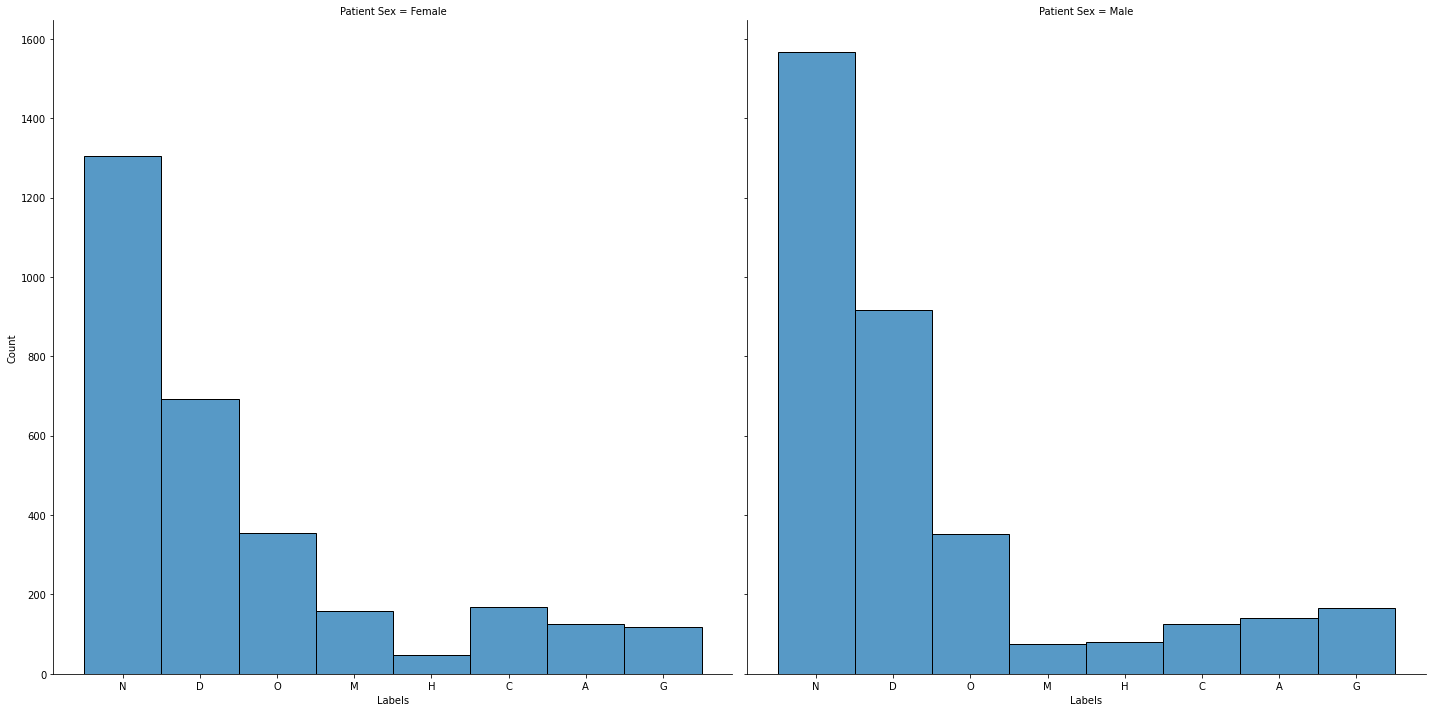

In [ ]:
import seaborn as sns
sns.displot(data_melted, x="Labels", col="Patient Sex",
    binwidth=6, height=10, facet_kws=dict(margin_titles=True),)
plt.show()

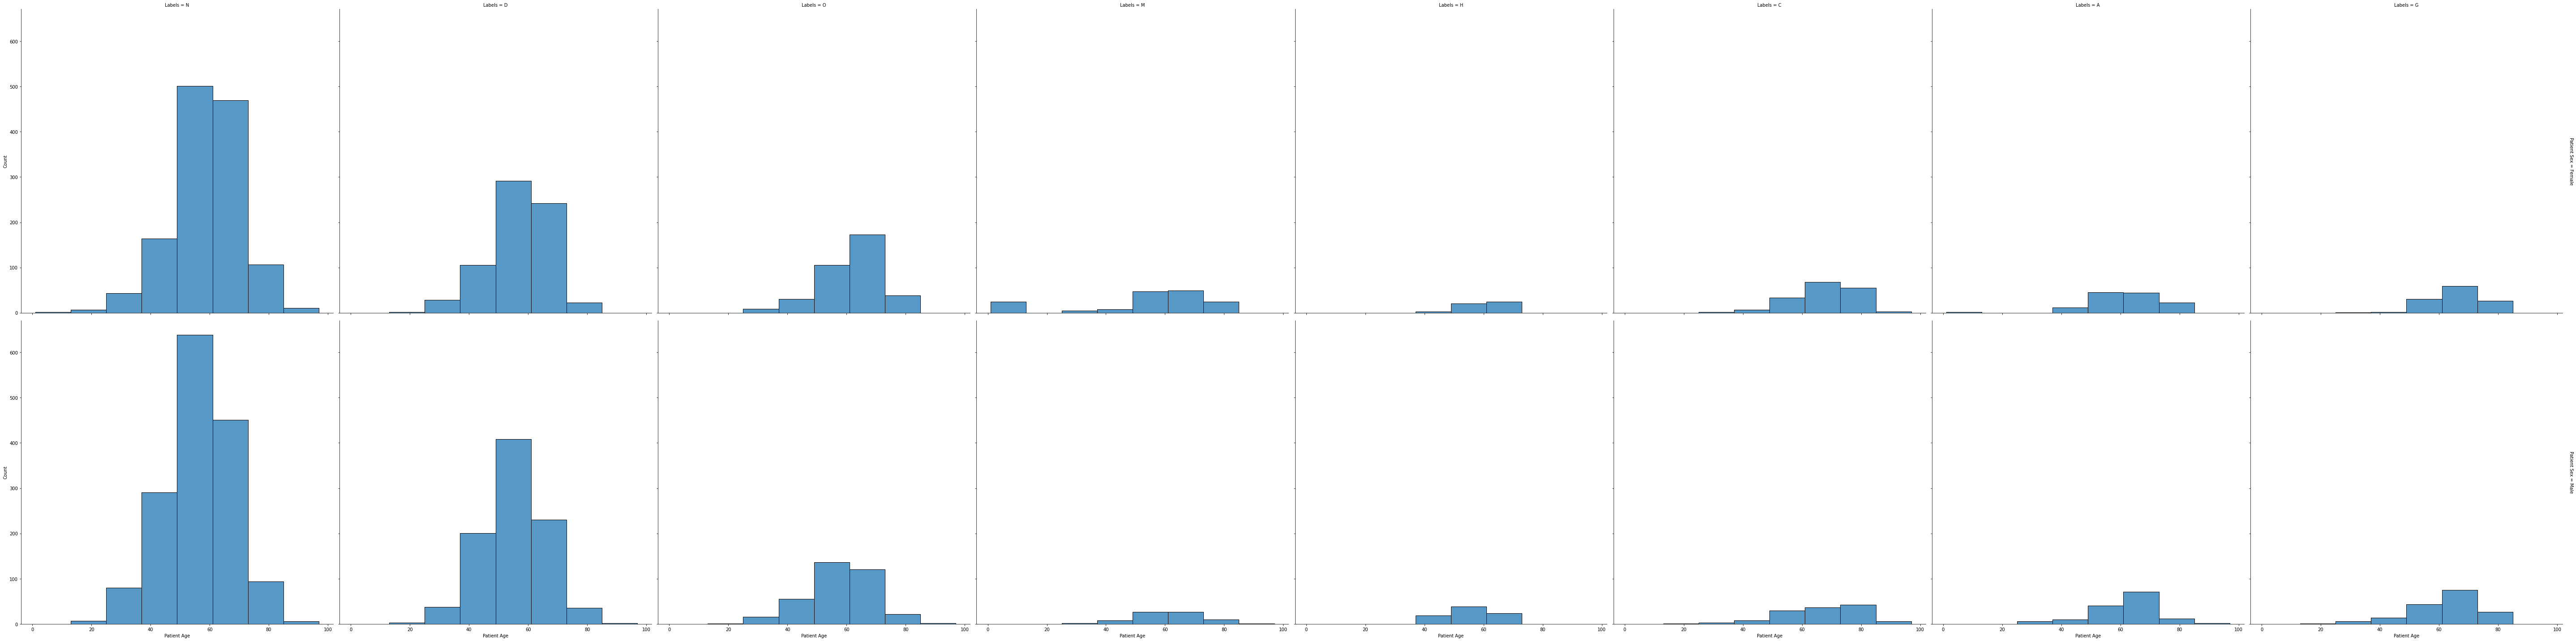

In [ ]:
sns.displot(data_melted, x="Patient Age", col="Labels", row='Patient Sex',
    binwidth=12, height=10, facet_kws=dict(margin_titles=True),)
plt.show()

In [ ]:
def check_disease(df,start,end):
    df = df.iloc[:, start:end]
    disease_name, zeroCount, oneCount = [], [], []
    rowLen = len(df)
    for (column_name, column) in df.iteritems():
        disease_name.append(column_name)    
        zeroCount.append(df[column_name].value_counts()[0])
    oneCount = [rowLen - x for x in zeroCount]
    
    return disease_name, zeroCount, oneCount

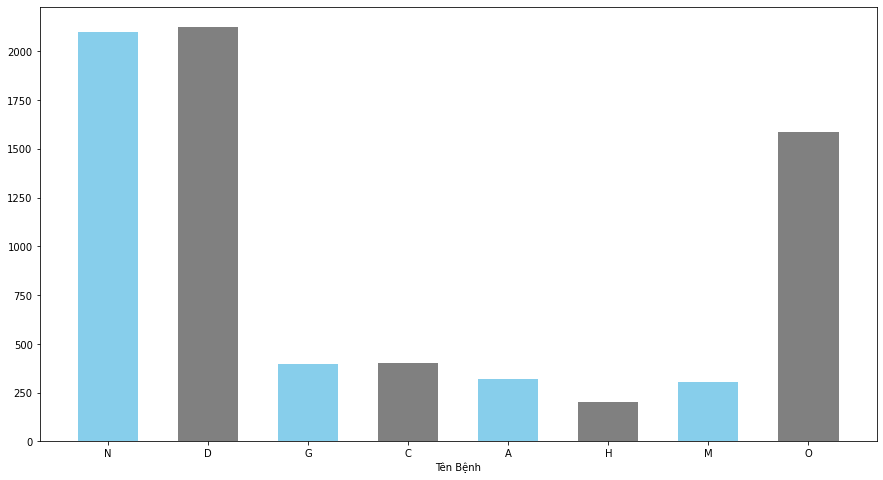

In [ ]:
disease_name, zeroCount, oneCount = check_disease(data,7,15)
fig = plt.figure(figsize=(15, 8))
plt.bar(disease_name, oneCount, width=0.6, color=['skyblue', 'gray'])
plt.xlabel('Tên Bệnh')
plt.savefig('TongTheCacLoaiBenhVeMat1.png')

In [ ]:
data=data.drop(columns=['N', 'D', 'H', 'O' ],axis=1)
data=data[((data['G'] == 1) | (data['C'] == 1) | (data['A']== 1) | (data['M'] == 1))]
classes=['G', 'C', 'A', 'M']
data = data.reset_index(drop=True)

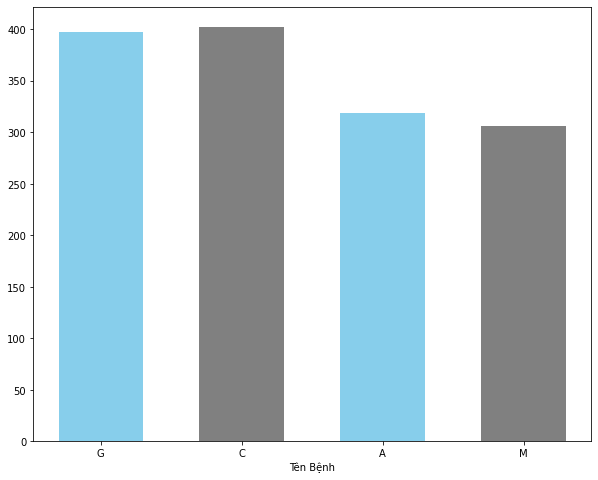

In [ ]:
disease_name, zeroCount, oneCount = check_disease(data,7,11)

fig = plt.figure(figsize=(10, 8))
plt.bar(disease_name, oneCount, width=0.6, color=['skyblue', 'gray'])
plt.xlabel('Tên Bệnh')
plt.savefig('TongTheCacLoaiBenhVeMat2.png')

In [ ]:
def plot_count(feature, title, df, size=1, show_all=False):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if show_all:
        g = sns.countplot(df[feature], palette='Set3')
        g.set_title("{} distribution".format(title))
    else:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
        if(size > 2):
            plt.xticks(rotation=90, size=8)
            for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,
                        height + 0.2,
                        '{:1.2f}%'.format(100*height/total),
                        ha="center") 
        g.set_title("Number and percentage of {}".format(title))
    plt.show() 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


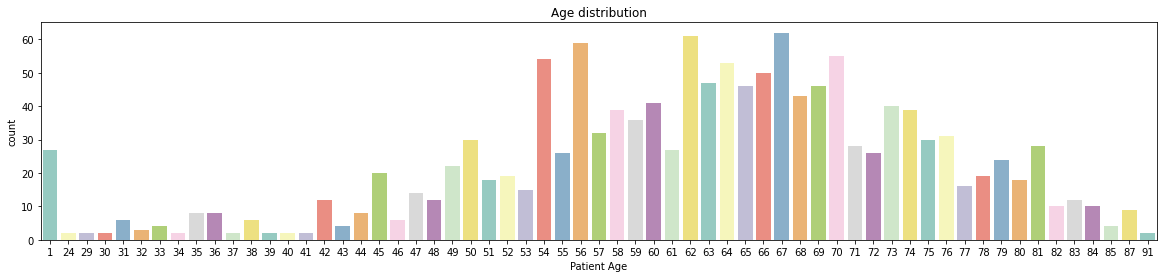

In [ ]:
plot_count("Patient Age", "Age", data, size=5, show_all=True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


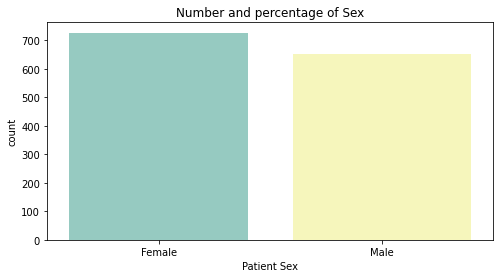

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


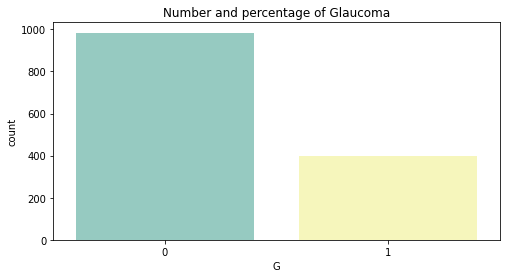

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


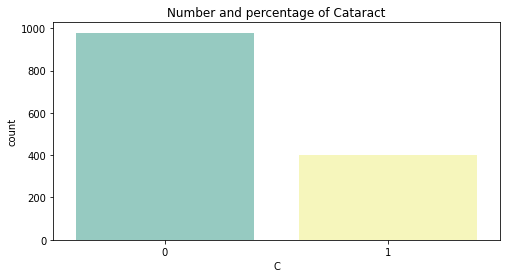

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


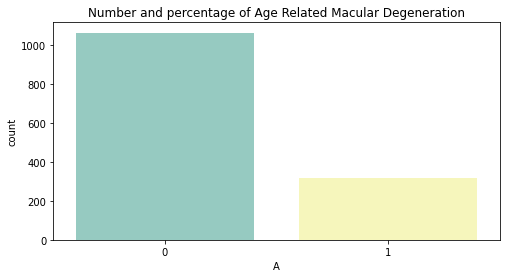

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


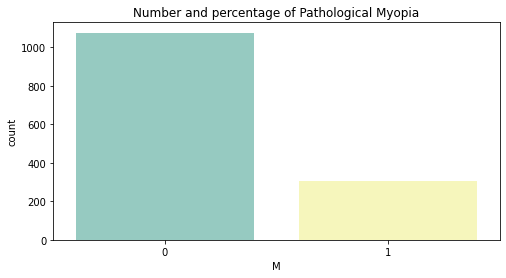

In [ ]:
plot_count("Patient Sex", "Sex", data, size=2)
plot_count("G", "Glaucoma", data, size=2)
plot_count("C", "Cataract", data, size=2)
plot_count("A", "Age Related Macular Degeneration", data, size=2)
plot_count("M", "Pathological Myopia", data, size=2)

In [ ]:
def plot_feature_distribution_grouped(feature, title, df, hue, size=4):
    plt.figure(figsize=(size*5,size*2))
    plt.title(title)
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    g = sns.countplot(df[feature], hue=df[hue], palette='Set3')
    plt.xlabel(feature)
    plt.legend()
    plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


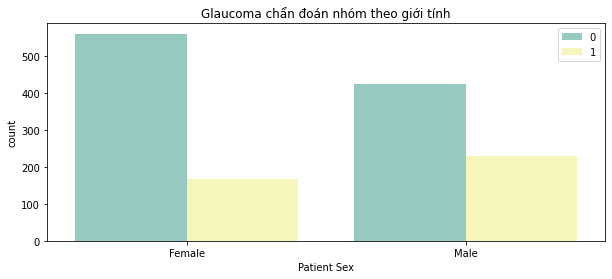

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


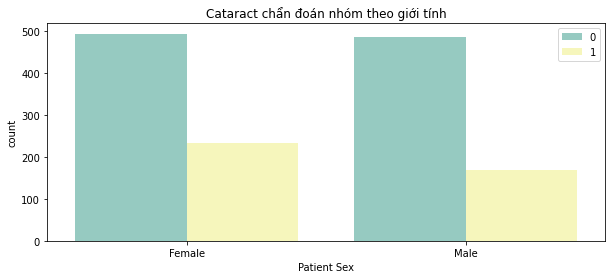

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


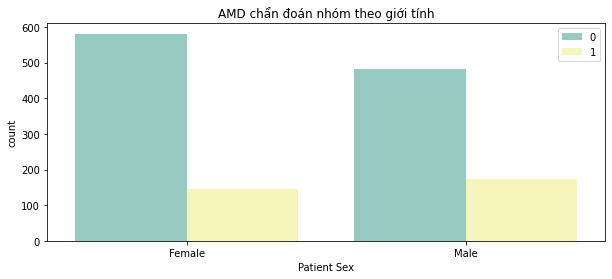

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


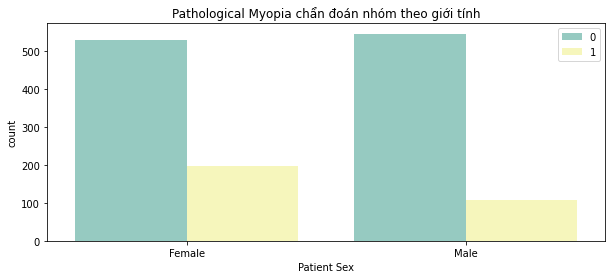

In [ ]:
plot_feature_distribution_grouped('Patient Sex', 'Glaucoma chẩn đoán nhóm theo giới tính', data, 'G', size=2)
plot_feature_distribution_grouped('Patient Sex', 'Cataract chẩn đoán nhóm theo giới tính', data, 'C', size=2)
plot_feature_distribution_grouped('Patient Sex', 'AMD chẩn đoán nhóm theo giới tính', data, 'A', size=2)
plot_feature_distribution_grouped('Patient Sex', 'Pathological Myopia chẩn đoán nhóm theo giới tính', data, 'M', size=2)


#II. Train model CNN

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Project

/content/drive/.shortcut-targets-by-id/1wS7udygAuPrf3idKH1EqnrDevABqC2Xe/Project


In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Project/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 7439 images belonging to 8 classes.


In [ ]:
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Project/Validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 64 images belonging to 8 classes.


In [ ]:
training_set.class_indices

{'Age related Macular Degeneration': 0,
 'Cataract': 1,
 'Diabetes': 2,
 'Glaucoma': 3,
 'Hypertension': 4,
 'Normal': 5,
 'Other diseases_abnormalities': 6,
 'Pathological Myopia': 7}

In [ ]:
validation.class_indices

{'Age related Macular Degeneration': 0,
 'Cataract': 1,
 'Diabetes': 2,
 'Glaucoma': 3,
 'Hypertension': 4,
 'Normal': 5,
 'Other diseases_abnormalities': 6,
 'Pathological Myopia': 7}

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(8,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(training_set,epochs=150,batch_size=128,verbose=1, validation_data=validation)

Epoch 1/150
233/233 [==============================] - 2377s 10s/step - loss: 1.8957 - accuracy: 0.2849 - val_loss: 2.3207 - val_accuracy: 0.1250
Epoch 2/150
233/233 [==============================] - 82s 353ms/step - loss: 1.7142 - accuracy: 0.2965 - val_loss: 2.4018 - val_accuracy: 0.1406
Epoch 3/150
233/233 [==============================] - 84s 359ms/step - loss: 1.6913 - accuracy: 0.3178 - val_loss: 2.5088 - val_accuracy: 0.1562
Epoch 4/150
233/233 [==============================] - 82s 352ms/step - loss: 1.6658 - accuracy: 0.3210 - val_loss: 2.2545 - val_accuracy: 0.1562
Epoch 5/150
233/233 [==============================] - 83s 355ms/step - loss: 1.6192 - accuracy: 0.3400 - val_loss: 2.0664 - val_accuracy: 0.1875
Epoch 6/150
233/233 [==============================] - 81s 349ms/step - loss: 1.5820 - accuracy: 0.3592 - val_loss: 2.2060 - val_accuracy: 0.2031
Epoch 7/150
233/233 [==============================] - 83s 356ms/step - loss: 1.5502 - accuracy: 0.3678 - val_loss: 2.2820 -

In [ ]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.5240001678466797
Train Accuracy 0.7812877893447876


<function matplotlib.pyplot.show(*args, **kw)>

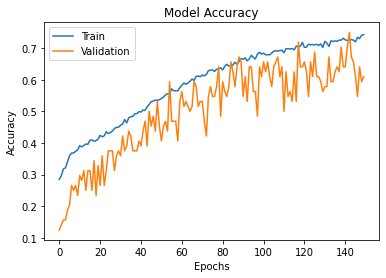

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
model.save("Project.h5")

In [ ]:
model_CNN=load_model("Project.h5")

#III. Test

1/1 [==============================] - 0s 15ms/step
Tăng nhãn áp (Glaucom): Tăng nhãn áp là chứng bệnh của mắt do áp suất trong nhãn cầu tăng cao, nếu không chữa trị có khả năng tăng qua độ đưa đến tác hại vào thần kinh thị giác và lòa hay mù. 


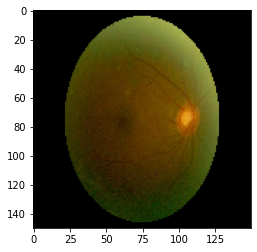

1/1 [==============================] - 0s 17ms/step
Các bệnh bất thường khác (Other diseases/abnormalities): Các bệnh lý bất thường khác của mắt chưa cụ thể trong nghiên cứu này. 


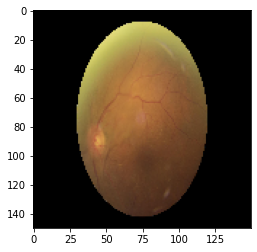

1/1 [==============================] - 0s 16ms/step
Bình thường (Normal): Không có bệnh lý nào phát hiện qua mắt


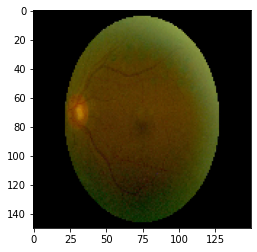

1/1 [==============================] - 0s 15ms/step
Bình thường (Normal): Không có bệnh lý nào phát hiện qua mắt


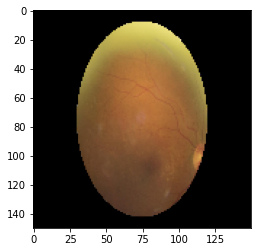

1/1 [==============================] - 0s 15ms/step
Bình thường (Normal): Không có bệnh lý nào phát hiện qua mắt


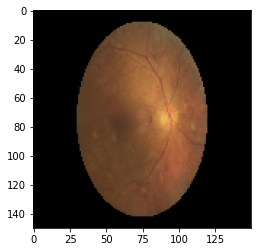

1/1 [==============================] - 0s 15ms/step
Bình thường (Normal): Không có bệnh lý nào phát hiện qua mắt


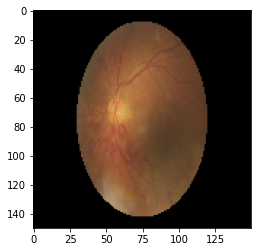

1/1 [==============================] - 0s 16ms/step
Bình thường (Normal): Không có bệnh lý nào phát hiện qua mắt


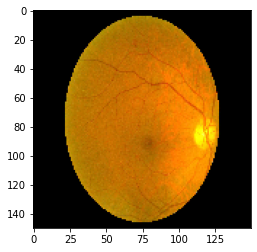

1/1 [==============================] - 0s 15ms/step
Các bệnh bất thường khác (Other diseases/abnormalities): Các bệnh lý bất thường khác của mắt chưa cụ thể trong nghiên cứu này. 


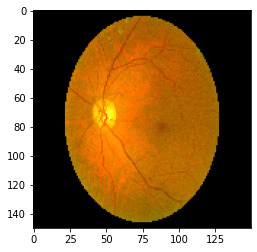

1/1 [==============================] - 0s 14ms/step
Các bệnh bất thường khác (Other diseases/abnormalities): Các bệnh lý bất thường khác của mắt chưa cụ thể trong nghiên cứu này. 


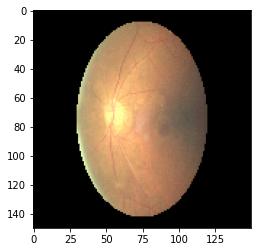

1/1 [==============================] - 0s 15ms/step
Các bệnh bất thường khác (Other diseases/abnormalities): Các bệnh lý bất thường khác của mắt chưa cụ thể trong nghiên cứu này. 


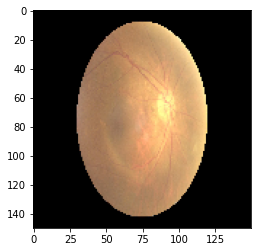

1/1 [==============================] - 0s 94ms/step
Tiểu Đường (Diabetes): Tiểu đường (hay đái tháo đường) là thuật ngữ dùng để đề cập tới một nhóm bệnh gây ảnh hưởng đến cách cơ thể sử dụng lượng đường (glucose) trong máu.


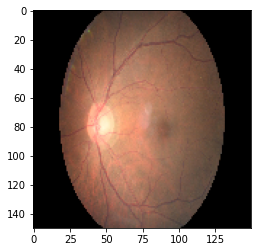

1/1 [==============================] - 0s 41ms/step
Tiểu Đường (Diabetes): Tiểu đường (hay đái tháo đường) là thuật ngữ dùng để đề cập tới một nhóm bệnh gây ảnh hưởng đến cách cơ thể sử dụng lượng đường (glucose) trong máu.


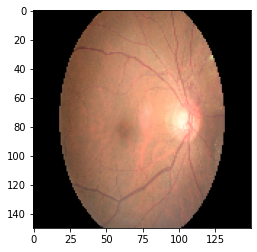

1/1 [==============================] - 0s 78ms/step
Tiểu Đường (Diabetes): Tiểu đường (hay đái tháo đường) là thuật ngữ dùng để đề cập tới một nhóm bệnh gây ảnh hưởng đến cách cơ thể sử dụng lượng đường (glucose) trong máu.


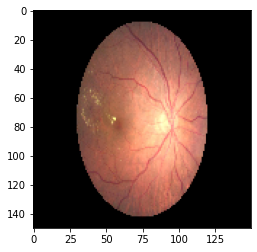

1/1 [==============================] - 0s 18ms/step
Tiểu Đường (Diabetes): Tiểu đường (hay đái tháo đường) là thuật ngữ dùng để đề cập tới một nhóm bệnh gây ảnh hưởng đến cách cơ thể sử dụng lượng đường (glucose) trong máu.


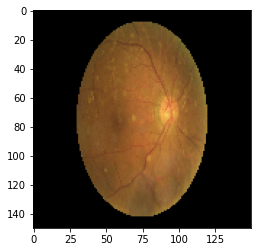

1/1 [==============================] - 0s 15ms/step
Bình thường (Normal): Không có bệnh lý nào phát hiện qua mắt


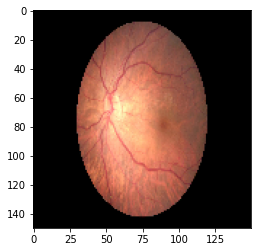

1/1 [==============================] - 0s 16ms/step
Bình thường (Normal): Không có bệnh lý nào phát hiện qua mắt


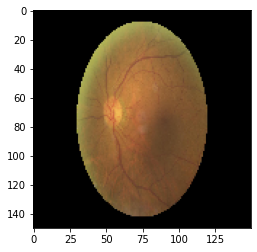

1/1 [==============================] - 0s 16ms/step
Bình thường (Normal): Không có bệnh lý nào phát hiện qua mắt


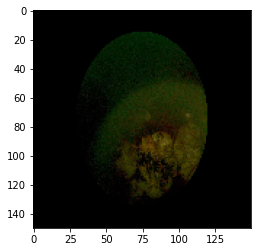

1/1 [==============================] - 0s 17ms/step
Bình thường (Normal): Không có bệnh lý nào phát hiện qua mắt


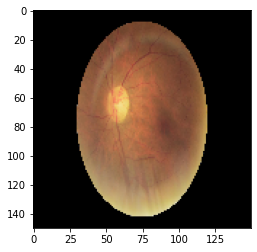

1/1 [==============================] - 0s 15ms/step
Thoái hóa điểm vàng liên quan đến tuổi tác (Age related Macular Degeneration): Thoái hóa điểm vàng hay còn gọi là thoái hóa hoàng điểm là sự thoái hóa các tế bào điểm vàng, làm mắt mất khả năng nhìn chi tiết ở vùng trung tâm thị giác làm thị giác giảm, hình ảnh được nhìn thấy mờ, méo mó, biến dạng. Thoái hóa điểm vàng không gây ra mù hoàn toàn, tầm nhìn xung quanh của người bệnh vẫn còn bình thường nhưng làm khả năng đọc, lái xe, nhận dạng màu sắc, sự tương phản lại bị suy yếu nghiêm trọng. Thoái hóa điểm vàng là nguyên nhân gây mất thị lực hàng đầu trên thế giới, chiếm khoảng 50% tất cả các trường hợp khiếm thị. 


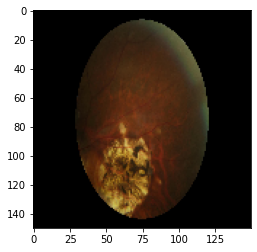

1/1 [==============================] - 0s 15ms/step
Cận thị thoái hóa (Pathological Myopia): Cận thị thoái hoá được định nghĩa là tật khúc xạ nghiêm trọng vì nó có độ cận thị cao trên 6 Diop. Trục nhãn cầu bị kéo dài liên tục khiến độ cận ngày một cao hơn. Bệnh có khả năng làm giãn võng mạc, mỏng màng mạch và củng mạc, gây ảnh hưởng nghiêm trọng đến sức khỏe của mắt.


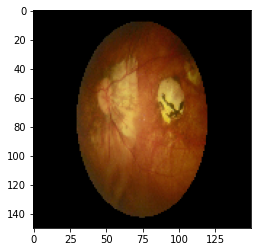

1/1 [==============================] - 0s 17ms/step
Cận thị thoái hóa (Pathological Myopia): Cận thị thoái hoá được định nghĩa là tật khúc xạ nghiêm trọng vì nó có độ cận thị cao trên 6 Diop. Trục nhãn cầu bị kéo dài liên tục khiến độ cận ngày một cao hơn. Bệnh có khả năng làm giãn võng mạc, mỏng màng mạch và củng mạc, gây ảnh hưởng nghiêm trọng đến sức khỏe của mắt.


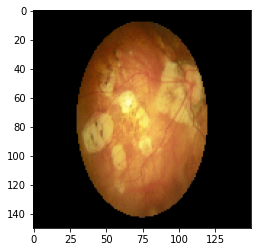

1/1 [==============================] - 0s 15ms/step
Cận thị thoái hóa (Pathological Myopia): Cận thị thoái hoá được định nghĩa là tật khúc xạ nghiêm trọng vì nó có độ cận thị cao trên 6 Diop. Trục nhãn cầu bị kéo dài liên tục khiến độ cận ngày một cao hơn. Bệnh có khả năng làm giãn võng mạc, mỏng màng mạch và củng mạc, gây ảnh hưởng nghiêm trọng đến sức khỏe của mắt.


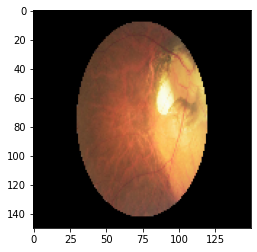

1/1 [==============================] - 0s 15ms/step
Cận thị thoái hóa (Pathological Myopia): Cận thị thoái hoá được định nghĩa là tật khúc xạ nghiêm trọng vì nó có độ cận thị cao trên 6 Diop. Trục nhãn cầu bị kéo dài liên tục khiến độ cận ngày một cao hơn. Bệnh có khả năng làm giãn võng mạc, mỏng màng mạch và củng mạc, gây ảnh hưởng nghiêm trọng đến sức khỏe của mắt.


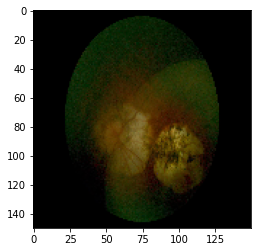

1/1 [==============================] - 0s 15ms/step
Bình thường (Normal): Không có bệnh lý nào phát hiện qua mắt


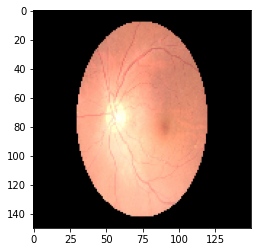

1/1 [==============================] - 0s 15ms/step
Bình thường (Normal): Không có bệnh lý nào phát hiện qua mắt


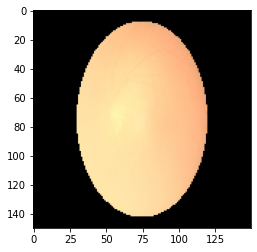

1/1 [==============================] - 0s 17ms/step
Bình thường (Normal): Không có bệnh lý nào phát hiện qua mắt


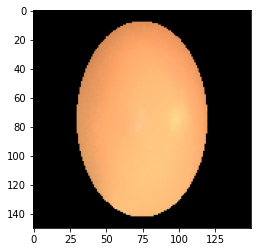

1/1 [==============================] - 0s 15ms/step
Đục thủy tinh thể (Cataract): Đục thủy tinh thể (còn gọi là đục nhân mắt, cườm đá, cườm khô) là tình trạng rối loạn thị lực do cấu trúc protein của thủy tinh thể bị thay đổi dưới tác động của các chất có hại sinh ra từ bên trong cơ thể hoặc từ môi trường bên ngoài. Nguyên nhân phổ biến nhất là do lão hóa.


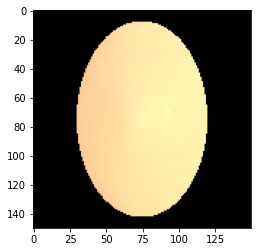

1/1 [==============================] - 0s 16ms/step
Bình thường (Normal): Không có bệnh lý nào phát hiện qua mắt


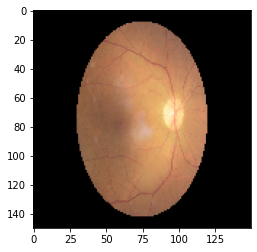

1/1 [==============================] - 0s 25ms/step
Tiểu Đường (Diabetes): Tiểu đường (hay đái tháo đường) là thuật ngữ dùng để đề cập tới một nhóm bệnh gây ảnh hưởng đến cách cơ thể sử dụng lượng đường (glucose) trong máu.


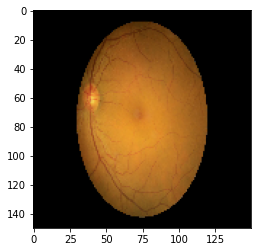

1/1 [==============================] - 0s 15ms/step
Tiểu Đường (Diabetes): Tiểu đường (hay đái tháo đường) là thuật ngữ dùng để đề cập tới một nhóm bệnh gây ảnh hưởng đến cách cơ thể sử dụng lượng đường (glucose) trong máu.


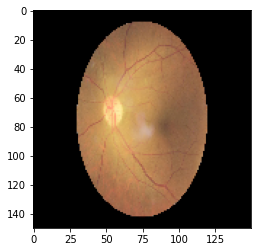

1/1 [==============================] - 0s 18ms/step
Các bệnh bất thường khác (Other diseases/abnormalities): Các bệnh lý bất thường khác của mắt chưa cụ thể trong nghiên cứu này. 


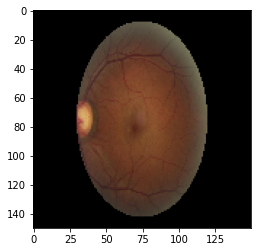

1/1 [==============================] - 0s 15ms/step
Các bệnh bất thường khác (Other diseases/abnormalities): Các bệnh lý bất thường khác của mắt chưa cụ thể trong nghiên cứu này. 


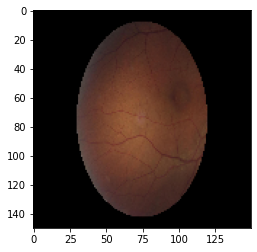

1/1 [==============================] - 0s 15ms/step
Các bệnh bất thường khác (Other diseases/abnormalities): Các bệnh lý bất thường khác của mắt chưa cụ thể trong nghiên cứu này. 


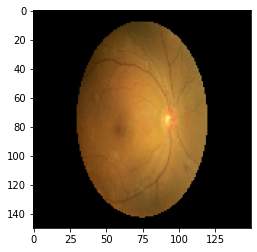

In [ ]:
test="/content/drive/MyDrive/Colab Notebooks/Project/Test"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='Thoái hóa điểm vàng liên quan đến tuổi tác (Age related Macular Degeneration): Thoái hóa điểm vàng hay còn gọi là thoái hóa hoàng điểm là sự thoái hóa các tế bào điểm vàng, làm mắt mất khả năng nhìn chi tiết ở vùng trung tâm thị giác làm thị giác giảm, hình ảnh được nhìn thấy mờ, méo mó, biến dạng. Thoái hóa điểm vàng không gây ra mù hoàn toàn, tầm nhìn xung quanh của người bệnh vẫn còn bình thường nhưng làm khả năng đọc, lái xe, nhận dạng màu sắc, sự tương phản lại bị suy yếu nghiêm trọng. Thoái hóa điểm vàng là nguyên nhân gây mất thị lực hàng đầu trên thế giới, chiếm khoảng 50% tất cả các trường hợp khiếm thị. '
  if round(result[0][1])==1:
    prediction='Đục thủy tinh thể (Cataract): Đục thủy tinh thể (còn gọi là đục nhân mắt, cườm đá, cườm khô) là tình trạng rối loạn thị lực do cấu trúc protein của thủy tinh thể bị thay đổi dưới tác động của các chất có hại sinh ra từ bên trong cơ thể hoặc từ môi trường bên ngoài. Nguyên nhân phổ biến nhất là do lão hóa.'
  if round(result[0][2])==1:
    prediction='Tiểu Đường (Diabetes): Tiểu đường (hay đái tháo đường) là thuật ngữ dùng để đề cập tới một nhóm bệnh gây ảnh hưởng đến cách cơ thể sử dụng lượng đường (glucose) trong máu.'
  if round(result[0][3])==1:
    prediction='Tăng nhãn áp (Glaucom): Tăng nhãn áp là chứng bệnh của mắt do áp suất trong nhãn cầu tăng cao, nếu không chữa trị có khả năng tăng qua độ đưa đến tác hại vào thần kinh thị giác và lòa hay mù. '
  if round(result[0][4])==1:
    prediction='Tăng huyết áp (Hypertension): Tăng huyết áp là tình trạng tăng liên tục của huyết áp tâm thu lúc nghỉ (≥ 130 mmHg) hoặc huyết áp tâm trương lúc nghỉ (≥ 80 mm Hg), hoặc cả hai. Tăng huyết áp mà không có nguyên nhân rõ ràng (tăng huyết áp tiên phát) là phổ biến nhất.'
  if round(result[0][5])==1:
    prediction='Bình thường (Normal): Không có bệnh lý nào phát hiện qua mắt'
  if round(result[0][6])==1:
    prediction='Các bệnh bất thường khác (Other diseases/abnormalities): Các bệnh lý bất thường khác của mắt chưa cụ thể trong nghiên cứu này. '
  if round(result[0][7])==1:
    prediction='Cận thị thoái hóa (Pathological Myopia): Cận thị thoái hoá được định nghĩa là tật khúc xạ nghiêm trọng vì nó có độ cận thị cao trên 6 Diop. Trục nhãn cầu bị kéo dài liên tục khiến độ cận ngày một cao hơn. Bệnh có khả năng làm giãn võng mạc, mỏng màng mạch và củng mạc, gây ảnh hưởng nghiêm trọng đến sức khỏe của mắt.'
  print(prediction)
  plt.show()